## **Import CSV File**

In [ ]:
import pandas as pd
import numpy as np #Membaca dataset, memproses dataset
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re
from google.colab import files
import io

In [ ]:
# Read Data
df = pd.read_csv('tweet_earthquake.csv')


In [ ]:
# Menghitung Jumlah Data
df.shape

(1030, 3)

In [ ]:
# Menampilkan Dataframe
df.head()

,date,username,text
0,2/7/2023 11:41,Jyot Jeet,"Earthquake leaves over 4,300 Dead in Turkey an..."
1,2/7/2023 12:32,ѕɪʀᴇɴѕ - ᓚᘏᗢ ℒᎯ ℒᎯℕᎯ 𖤍᭄,God please help #Syria and #Turkey this is so ...
2,2/7/2023 12:34,𝑴𝒂𝒍𝒂𝒌 𝑨𝒔𝒈𝒉𝒂𝒓,Alkhidmat Foundation Pakistan @AlkhidmatOrgin ...
3,2/7/2023 12:34,Jhoa Vall,BE SYRIA’S VOICE #HelpSyria #PrayforSyria #ea...
4,2/7/2023 12:35,H Sakib shaikh,May Allah protect Turkey and syria. \n#earthqu...


# ***Preprocessing***

## ***Cleansing***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re
from google.colab import files
import io

In [ ]:
# Hapus Tagar & URL
def deleteTagTwitter(text):
  return re.sub(r"[@#]\w+|\||\_|\.n|#", r"", text)
df['text'] = df['text'].apply(lambda x: deleteTagTwitter(x))

def deleteHttps(text):
  return re.sub(r"http\S+", r"", text)
df['text'] = df['text'].apply(lambda x: deleteHttps(x))

def remove_punctuation(text):
  #text
  text= re.sub(r'[^a-zA-z0-9]',' ',str(text))
  text= re.sub(r'\b\w(1,2)\b',' ',text) #menghilangkan 2 kata
  text= re.sub(r'\s\s+',' ',text)
  return text
df['text'] = df['text'].apply(lambda x: remove_punctuation(x))

def cleaning_text(text):
  text = re.sub(r'[@]',r' ',text)
  return text
df['text'] = df['text'].apply(lambda x: cleaning_text(x))

df.head()

,date,username,text
0,2/7/2023 11:41,Jyot Jeet,Earthquake leaves over 4 300 Dead in Turkey an...
1,2/7/2023 12:32,ѕɪʀᴇɴѕ - ᓚᘏᗢ ℒᎯ ℒᎯℕᎯ 𖤍᭄,God please help and this is so sad
2,2/7/2023 12:34,𝑴𝒂𝒍𝒂𝒌 𝑨𝒔𝒈𝒉𝒂𝒓,Alkhidmat Foundation Pakistan collaboration wi...
3,2/7/2023 12:34,Jhoa Vall,BE SYRIA S VOICE
4,2/7/2023 12:35,H Sakib shaikh,May Allah protect Turkey and syria


## ***Case Folding***

In [ ]:
df['case folding'] = df['text'].str.lower() #Menggunakan fungsi Series.str.lower() pada Pandas

df.head()

,date,username,text,case folding
0,2/7/2023 11:41,Jyot Jeet,Earthquake leaves over 4 300 Dead in Turkey an...,earthquake leaves over 4 300 dead in turkey an...
1,2/7/2023 12:32,ѕɪʀᴇɴѕ - ᓚᘏᗢ ℒᎯ ℒᎯℕᎯ 𖤍᭄,God please help and this is so sad,god please help and this is so sad
2,2/7/2023 12:34,𝑴𝒂𝒍𝒂𝒌 𝑨𝒔𝒈𝒉𝒂𝒓,Alkhidmat Foundation Pakistan collaboration wi...,alkhidmat foundation pakistan collaboration wi...
3,2/7/2023 12:34,Jhoa Vall,BE SYRIA S VOICE,be syria s voice
4,2/7/2023 12:35,H Sakib shaikh,May Allah protect Turkey and syria,may allah protect turkey and syria


## ***Tokenizing***

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def word_tokennize_wrapper(text):
  return word_tokenize(text)
df['tokenizing'] = df['case folding'].apply(lambda x: word_tokennize_wrapper(x))

df.head()

,date,username,text,case folding,tokenizing
0,2/7/2023 11:41,Jyot Jeet,Earthquake leaves over 4 300 Dead in Turkey an...,earthquake leaves over 4 300 dead in turkey an...,"[earthquake, leaves, over, 4, 300, dead, in, t..."
1,2/7/2023 12:32,ѕɪʀᴇɴѕ - ᓚᘏᗢ ℒᎯ ℒᎯℕᎯ 𖤍᭄,God please help and this is so sad,god please help and this is so sad,"[god, please, help, and, this, is, so, sad]"
2,2/7/2023 12:34,𝑴𝒂𝒍𝒂𝒌 𝑨𝒔𝒈𝒉𝒂𝒓,Alkhidmat Foundation Pakistan collaboration wi...,alkhidmat foundation pakistan collaboration wi...,"[alkhidmat, foundation, pakistan, collaboratio..."
3,2/7/2023 12:34,Jhoa Vall,BE SYRIA S VOICE,be syria s voice,"[be, syria, s, voice]"
4,2/7/2023 12:35,H Sakib shaikh,May Allah protect Turkey and syria,may allah protect turkey and syria,"[may, allah, protect, turkey, and, syria]"


## **Filtering**

In [ ]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

list_stopwords = stopwords.words('english')
#Menambahkan stopword manual
list_stopwords.extend(['amp'])

def remove_stopwords(text):
  text = [word for word in text if word not in list_stopwords]
  return text

df['filtering'] = df['tokenizing'].apply(lambda x: remove_stopwords(x))
df.head()

,date,username,text,case folding,tokenizing,filtering
0,2/7/2023 11:41,Jyot Jeet,Earthquake leaves over 4 300 Dead in Turkey an...,earthquake leaves over 4 300 dead in turkey an...,"[earthquake, leaves, over, 4, 300, dead, in, t...","[earthquake, leaves, 4, 300, dead, turkey, syr..."
1,2/7/2023 12:32,ѕɪʀᴇɴѕ - ᓚᘏᗢ ℒᎯ ℒᎯℕᎯ 𖤍᭄,God please help and this is so sad,god please help and this is so sad,"[god, please, help, and, this, is, so, sad]","[god, please, help, sad]"
2,2/7/2023 12:34,𝑴𝒂𝒍𝒂𝒌 𝑨𝒔𝒈𝒉𝒂𝒓,Alkhidmat Foundation Pakistan collaboration wi...,alkhidmat foundation pakistan collaboration wi...,"[alkhidmat, foundation, pakistan, collaboratio...","[alkhidmat, foundation, pakistan, collaboratio..."
3,2/7/2023 12:34,Jhoa Vall,BE SYRIA S VOICE,be syria s voice,"[be, syria, s, voice]","[syria, voice]"
4,2/7/2023 12:35,H Sakib shaikh,May Allah protect Turkey and syria,may allah protect turkey and syria,"[may, allah, protect, turkey, and, syria]","[may, allah, protect, turkey, syria]"


## **Stemming**

In [ ]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
df['stemmed'] = df['filtering'].apply(lambda x: stemming(x))

df.head()

,date,username,text,case folding,tokenizing,filtering,stemmed
0,2/7/2023 11:41,Jyot Jeet,Earthquake leaves over 4 300 Dead in Turkey an...,earthquake leaves over 4 300 dead in turkey an...,"[earthquake, leaves, over, 4, 300, dead, in, t...","[earthquake, leaves, 4, 300, dead, turkey, syr...","[earthquak, leav, 4, 300, dead, turkey, syria,..."
1,2/7/2023 12:32,ѕɪʀᴇɴѕ - ᓚᘏᗢ ℒᎯ ℒᎯℕᎯ 𖤍᭄,God please help and this is so sad,god please help and this is so sad,"[god, please, help, and, this, is, so, sad]","[god, please, help, sad]","[god, pleas, help, sad]"
2,2/7/2023 12:34,𝑴𝒂𝒍𝒂𝒌 𝑨𝒔𝒈𝒉𝒂𝒓,Alkhidmat Foundation Pakistan collaboration wi...,alkhidmat foundation pakistan collaboration wi...,"[alkhidmat, foundation, pakistan, collaboratio...","[alkhidmat, foundation, pakistan, collaboratio...","[alkhidmat, foundat, pakistan, collabor, turki..."
3,2/7/2023 12:34,Jhoa Vall,BE SYRIA S VOICE,be syria s voice,"[be, syria, s, voice]","[syria, voice]","[syria, voic]"
4,2/7/2023 12:35,H Sakib shaikh,May Allah protect Turkey and syria,may allah protect turkey and syria,"[may, allah, protect, turkey, and, syria]","[may, allah, protect, turkey, syria]","[may, allah, protect, turkey, syria]"


In [ ]:
# Remove punct
def remove_punct(text):
    text  = " ".join([char for char in text if char not in string.punctuation])
    return text
df['tweet_final'] = df['stemmed'].apply(lambda x: remove_punct(x))


In [ ]:
df.to_csv('data_clean_v2.csv', index=False)

In [ ]:
#Read Data Final
data_final = pd.read_csv('data_clean_v2.csv')

df.head()

,date,username,text,case folding,tokenizing,filtering,stemmed,tweet_final
0,2/7/2023 11:41,Jyot Jeet,Earthquake leaves over 4 300 Dead in Turkey an...,earthquake leaves over 4 300 dead in turkey an...,"[earthquake, leaves, over, 4, 300, dead, in, t...","[earthquake, leaves, 4, 300, dead, turkey, syr...","[earthquak, leav, 4, 300, dead, turkey, syria,...",earthquak leav 4 300 dead turkey syria peopl l...
1,2/7/2023 12:32,ѕɪʀᴇɴѕ - ᓚᘏᗢ ℒᎯ ℒᎯℕᎯ 𖤍᭄,God please help and this is so sad,god please help and this is so sad,"[god, please, help, and, this, is, so, sad]","[god, please, help, sad]","[god, pleas, help, sad]",god pleas help sad
2,2/7/2023 12:34,𝑴𝒂𝒍𝒂𝒌 𝑨𝒔𝒈𝒉𝒂𝒓,Alkhidmat Foundation Pakistan collaboration wi...,alkhidmat foundation pakistan collaboration wi...,"[alkhidmat, foundation, pakistan, collaboratio...","[alkhidmat, foundation, pakistan, collaboratio...","[alkhidmat, foundat, pakistan, collabor, turki...",alkhidmat foundat pakistan collabor turkish pa...
3,2/7/2023 12:34,Jhoa Vall,BE SYRIA S VOICE,be syria s voice,"[be, syria, s, voice]","[syria, voice]","[syria, voic]",syria voic
4,2/7/2023 12:35,H Sakib shaikh,May Allah protect Turkey and syria,may allah protect turkey and syria,"[may, allah, protect, turkey, and, syria]","[may, allah, protect, turkey, syria]","[may, allah, protect, turkey, syria]",may allah protect turkey syria


In [ ]:
# Data clean
#hanya select kolom text saja
#data_final = df[['stemmed']]

# **Pelabelan Metode Lexicon Based dengan VADER Sentiment**

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")
import pandas as pd
data = pd.read_csv('data_clean_v2.csv') # Import Dataset Hasil Preprocessing
data = data.dropna()
data.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,date,username,text,case folding,tokenizing,filtering,stemmed,tweet_final
0,2/7/2023 11:41,Jyot Jeet,Earthquake leaves over 4 300 Dead in Turkey an...,earthquake leaves over 4 300 dead in turkey an...,"['earthquake', 'leaves', 'over', '4', '300', '...","['earthquake', 'leaves', '4', '300', 'dead', '...","['earthquak', 'leav', '4', '300', 'dead', 'tur...",earthquak leav 4 300 dead turkey syria peopl l...
1,2/7/2023 12:32,ѕɪʀᴇɴѕ - ᓚᘏᗢ ℒᎯ ℒᎯℕᎯ 𖤍᭄,God please help and this is so sad,god please help and this is so sad,"['god', 'please', 'help', 'and', 'this', 'is',...","['god', 'please', 'help', 'sad']","['god', 'pleas', 'help', 'sad']",god pleas help sad
2,2/7/2023 12:34,𝑴𝒂𝒍𝒂𝒌 𝑨𝒔𝒈𝒉𝒂𝒓,Alkhidmat Foundation Pakistan collaboration wi...,alkhidmat foundation pakistan collaboration wi...,"['alkhidmat', 'foundation', 'pakistan', 'colla...","['alkhidmat', 'foundation', 'pakistan', 'colla...","['alkhidmat', 'foundat', 'pakistan', 'collabor...",alkhidmat foundat pakistan collabor turkish pa...
3,2/7/2023 12:34,Jhoa Vall,BE SYRIA S VOICE,be syria s voice,"['be', 'syria', 's', 'voice']","['syria', 'voice']","['syria', 'voic']",syria voic
4,2/7/2023 12:35,H Sakib shaikh,May Allah protect Turkey and syria,may allah protect turkey and syria,"['may', 'allah', 'protect', 'turkey', 'and', '...","['may', 'allah', 'protect', 'turkey', 'syria']","['may', 'allah', 'protect', 'turkey', 'syria']",may allah protect turkey syria


In [ ]:
# Hitung Data setelah Preprocessing
data.shape

(1028, 8)

In [ ]:
sentiments = SentimentIntensityAnalyzer()
data["Positif"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet_final"]]
data["Negatif"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet_final"]]
data["Netral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet_final"]]
data["compound"] = [sentiments.polarity_scores(i)["compound"] for i in data["tweet_final"]]

data.head()

,date,username,text,case folding,tokenizing,filtering,stemmed,tweet_final,Positif,Negatif,Netral,compound
0,2/7/2023 11:41,Jyot Jeet,Earthquake leaves over 4 300 Dead in Turkey an...,earthquake leaves over 4 300 dead in turkey an...,"['earthquake', 'leaves', 'over', '4', '300', '...","['earthquake', 'leaves', '4', '300', 'dead', '...","['earthquak', 'leav', '4', '300', 'dead', 'tur...",earthquak leav 4 300 dead turkey syria peopl l...,0.000,0.452,0.548,-0.7650
1,2/7/2023 12:32,ѕɪʀᴇɴѕ - ᓚᘏᗢ ℒᎯ ℒᎯℕᎯ 𖤍᭄,God please help and this is so sad,god please help and this is so sad,"['god', 'please', 'help', 'and', 'this', 'is',...","['god', 'please', 'help', 'sad']","['god', 'pleas', 'help', 'sad']",god pleas help sad,0.539,0.348,0.112,0.1779
2,2/7/2023 12:34,𝑴𝒂𝒍𝒂𝒌 𝑨𝒔𝒈𝒉𝒂𝒓,Alkhidmat Foundation Pakistan collaboration wi...,alkhidmat foundation pakistan collaboration wi...,"['alkhidmat', 'foundation', 'pakistan', 'colla...","['alkhidmat', 'foundation', 'pakistan', 'colla...","['alkhidmat', 'foundat', 'pakistan', 'collabor...",alkhidmat foundat pakistan collabor turkish pa...,0.000,0.000,1.000,0.0000
3,2/7/2023 12:34,Jhoa Vall,BE SYRIA S VOICE,be syria s voice,"['be', 'syria', 's', 'voice']","['syria', 'voice']","['syria', 'voic']",syria voic,0.000,0.000,1.000,0.0000
4,2/7/2023 12:35,H Sakib shaikh,May Allah protect Turkey and syria,may allah protect turkey and syria,"['may', 'allah', 'protect', 'turkey', 'and', '...","['may', 'allah', 'protect', 'turkey', 'syria']","['may', 'allah', 'protect', 'turkey', 'syria']",may allah protect turkey syria,0.394,0.000,0.606,0.3818


In [ ]:
score = data["compound"].values
sentiment = []
for i in score:
  if i > 0:
    sentiment.append('positif')
  elif i < 0:
    sentiment.append('negatif')
  else:
    sentiment.append('netral')

data["Sentiment"] = sentiment

data.head(25)

,date,username,text,case folding,tokenizing,filtering,stemmed,tweet_final,Positif,Negatif,Netral,compound,Sentiment
0,2/7/2023 11:41,Jyot Jeet,Earthquake leaves over 4 300 Dead in Turkey an...,earthquake leaves over 4 300 dead in turkey an...,"['earthquake', 'leaves', 'over', '4', '300', '...","['earthquake', 'leaves', '4', '300', 'dead', '...","['earthquak', 'leav', '4', '300', 'dead', 'tur...",earthquak leav 4 300 dead turkey syria peopl l...,0.000,0.452,0.548,-0.7650,negatif
1,2/7/2023 12:32,ѕɪʀᴇɴѕ - ᓚᘏᗢ ℒᎯ ℒᎯℕᎯ 𖤍᭄,God please help and this is so sad,god please help and this is so sad,"['god', 'please', 'help', 'and', 'this', 'is',...","['god', 'please', 'help', 'sad']","['god', 'pleas', 'help', 'sad']",god pleas help sad,0.539,0.348,0.112,0.1779,positif
2,2/7/2023 12:34,𝑴𝒂𝒍𝒂𝒌 𝑨𝒔𝒈𝒉𝒂𝒓,Alkhidmat Foundation Pakistan collaboration wi...,alkhidmat foundation pakistan collaboration wi...,"['alkhidmat', 'foundation', 'pakistan', 'colla...","['alkhidmat', 'foundation', 'pakistan', 'colla...","['alkhidmat', 'foundat', 'pakistan', 'collabor...",alkhidmat foundat pakistan collabor turkish pa...,0.000,0.000,1.000,0.0000,netral
3,2/7/2023 12:34,Jhoa Vall,BE SYRIA S VOICE,be syria s voice,"['be', 'syria', 's', 'voice']","['syria', 'voice']","['syria', 'voic']",syria voic,0.000,0.000,1.000,0.0000,netral
4,2/7/2023 12:35,H Sakib shaikh,May Allah protect Turkey and syria,may allah protect turkey and syria,"['may', 'allah', 'protect', 'turkey', 'and', '...","['may', 'allah', 'protect', 'turkey', 'syria']","['may', 'allah', 'protect', 'turkey', 'syria']",may allah protect turkey syria,0.394,0.000,0.606,0.3818,positif
5,2/7/2023 12:37,Tajweez Properties PVT LTD.,Prayers for Turkey Syria Lebanon May Allah hel...,prayers for turkey syria lebanon may allah hel...,"['prayers', 'for', 'turkey', 'syria', 'lebanon...","['prayers', 'turkey', 'syria', 'lebanon', 'may...","['prayer', 'turkey', 'syria', 'lebanon', 'may'...",prayer turkey syria lebanon may allah help pro...,0.371,0.000,0.629,0.6486,positif
6,2/7/2023 12:39,LogicaBeans,Heartbreaking news from Turkey and Sriya after...,heartbreaking news from turkey and sriya after...,"['heartbreaking', 'news', 'from', 'turkey', 'a...","['heartbreaking', 'news', 'turkey', 'sriya', '...","['heartbreak', 'news', 'turkey', 'sriya', 'pow...",heartbreak news turkey sriya power earthquak h...,0.199,0.253,0.548,-0.2023,negatif
7,2/7/2023 12:44,Jinnah's Views,Hazrat Ayesha RA Said Powerful 7 8 Cyprus,hazrat ayesha ra said powerful 7 8 cyprus,"['hazrat', 'ayesha', 'ra', 'said', 'powerful',...","['hazrat', 'ayesha', 'ra', 'said', 'powerful',...","['hazrat', 'ayesha', 'ra', 'said', 'power', '7...",hazrat ayesha ra said power 7 8 cypru,0.000,0.000,1.000,0.0000,netral
8,2/7/2023 12:46,Nature,Turkey,turkey,['turkey'],['turkey'],['turkey'],turkey,0.000,0.000,1.000,0.0000,netral
9,2/7/2023 12:58,Pravin. S. Survase,Earthquake leaves over 4 300 Dead in Turkey an...,earthquake leaves over 4 300 dead in turkey an...,"['earthquake', 'leaves', 'over', '4', '300', '...","['earthquake', 'leaves', '4', '300', 'dead', '...","['earthquak', 'leav', '4', '300', 'dead', 'tur...",earthquak leav 4 300 dead turkey syria,0.000,0.462,0.538,-0.6486,negatif


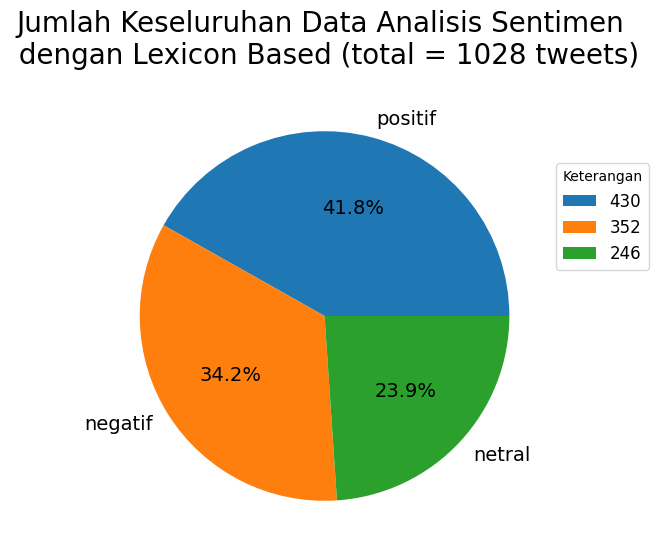

In [ ]:
fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in data["Sentiment"].value_counts()]
labels = list(data["Sentiment"].value_counts().index)
explode = (0, 0, 0)
mylabels = data["Sentiment"].value_counts()

ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 14})
ax.set_title('Jumlah Keseluruhan Data Analisis Sentimen \n dengan Lexicon Based (total = 1028 tweets)', fontsize = 20, pad = 15)
plt.legend(title="Keterangan",labels = mylabels, loc = (1, 0.60),fontsize = 12)
plt.show()

In [ ]:
# Save Data Label
data.to_csv('data_Label_Vader.csv', index=False)

# **Transformasi TF-IDF**

**1. Menghitung TF-IDF menggunakan Scikit-Learn**

In [1]:
#--------------Library Klasifikasi Naive Bayes--------------------
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [2]:
import pandas as pd
import numpy as np

TWEET_PREP = pd.read_csv("data_Label_Vader.csv", usecols=["stemmed", "Sentiment"])
TWEET_PREP.columns = ["tweet", "kelas"]
pd.set_option('max_colwidth',1)

TWEET_PREP.head(10)

,tweet,kelas
0,"['earthquak', 'leav', '4', '300', 'dead', 'turkey', 'syria', 'peopl', 'lost', 'entir', 'famili']",negatif
1,"['god', 'pleas', 'help', 'sad']",positif
2,"['alkhidmat', 'foundat', 'pakistan', 'collabor', 'turkish', 'partner', 'organ', 'respond', 'ground']",neutral
3,"['syria', 'voic']",neutral
4,"['may', 'allah', 'protect', 'turkey', 'syria']",positif
5,"['prayer', 'turkey', 'syria', 'lebanon', 'may', 'allah', 'help', 'protect', 'effect', 'merci', 'everyon']",positif
6,"['heartbreak', 'news', 'turkey', 'sriya', 'power', 'earthquak', 'hit', 'stay', 'safe', 'everyon']",negatif
7,"['hazrat', 'ayesha', 'ra', 'said', 'power', '7', '8', 'cypru']",neutral
8,['turkey'],neutral
9,"['earthquak', 'leav', '4', '300', 'dead', 'turkey', 'syria']",negatif


In [3]:
# menggabungkan token menjadi list bentuk kalimat
import ast

def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])
TWEET_PREP["tweet_join"] = TWEET_PREP["tweet"].apply(join_text_list)

TWEET_PREP["tweet_join"].head(10)

0    earthquak leav 4 300 dead turkey syria peopl lost entir famili          
1    god pleas help sad                                                      
2    alkhidmat foundat pakistan collabor turkish partner organ respond ground
3    syria voic                                                              
4    may allah protect turkey syria                                          
5    prayer turkey syria lebanon may allah help protect effect merci everyon 
6    heartbreak news turkey sriya power earthquak hit stay safe everyon      
7    hazrat ayesha ra said power 7 8 cypru                                   
8    turkey                                                                  
9    earthquak leav 4 300 dead turkey syria                                  
Name: tweet_join, dtype: object

In [4]:
X_join = TWEET_PREP["tweet_join"]
#contoh untuk mengetahui jumlah term dari 1 dokumen
komen_tf = X_join[0],
print(komen_tf)

('earthquak leav 4 300 dead turkey syria peopl lost entir famili',)


In [5]:
cv = CountVectorizer()
term_fit = cv.fit(X_join)

term_frequency = term_fit.transform(komen_tf) #hanya menampilkan hasil document 1
#kolom 1 = dokumen ke-
#kolom 2 = term ke-
#kolom 3 = jumlah term dalam 1 dokumen
print ("Jumlah Kemunculan Kata")
print (term_frequency)

Jumlah Kemunculan Kata
  (0, 82)	1
  (0, 752)	1
  (0, 890)	1
  (0, 944)	1
  (0, 1026)	1
  (0, 1537)	1
  (0, 1600)	1
  (0, 1922)	1
  (0, 2519)	1
  (0, 2655)	1


`Ouput diatas merupakan jumlah kemunculan kata dari 1 dokumen`
*   kolom 1 = dokumen ke-
*   kolom 2 = term ke-
*   kolom 3 = jumlah term dalam 1 dokumen





In [6]:
max_features = 1000

tf_idf = TfidfVectorizer(max_features=max_features, binary=True)
tfidf_mat = tf_idf.fit_transform(TWEET_PREP["tweet_join"]).toarray()

terms = tf_idf.get_feature_names_out()

# sum tfidf frequency dari setiap dokumen
sums = tfidf_mat.sum(axis=0)

# connecting term to its sums frequency
data = []
for col, term in enumerate(terms):
    data.append((term, sums[col]))

ranking = pd.DataFrame(data, columns=['term','rank'])
ranking.sort_values('rank', ascending=False)

,term,rank
936,turkey,73.517630
262,earthquak,66.338475
887,syria,51.336146
422,help,28.297637
651,peopl,28.004981
...,...,...
410,hatayspor,0.575355
711,rabb,0.561013
329,firm,0.561013
475,interest,0.558592


`Data diatas merupakan Frekuensi Kata yang paling sering muncul dari setiap dokume`n

**2. Mencari Nilai TF-IDF menggunakan N-Gram**

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize

max_features = 1000

def generate_tfidf_mat(min_gram, max_gram):
    cvect = CountVectorizer(max_features=max_features)
    counts = cvect.fit_transform(TWEET_PREP["tweet_join"])

    normalized_counts = normalize(counts, norm='l1', axis=1)

    tfidf = TfidfVectorizer(max_features=max_features, smooth_idf=False)
    tfs = tfidf.fit_transform(TWEET_PREP["tweet_join"])

    tfidf_mat = normalized_counts.multiply(tfidf.idf_).toarray()

    TF = normalized_counts.toarray()
    IDF = tfidf.idf_
    TF_IDF = tfidf_mat
    return TF, IDF, TF_IDF, tfidf.get_feature_names_out()

# ngram_range (1, 1) to use unigram only
tf_mat_unigram, idf_mat_unigram, tfidf_mat_unigram, terms_unigram = generate_tfidf_mat(1,1)

# ---------- check sparse data -------------------
idx_sample = 0

print("Show TFIDF sample ke-" + str(idx_sample), "\n")
print(TWEET_PREP["tweet"][idx_sample], "\n")

print("\t", "\tTerm", "\t", "TF", "\t", "IDF", "\t", "TF-IDF\n")
for i, item in enumerate(zip(tf_mat_unigram[idx_sample], idf_mat_unigram, tfidf_mat_unigram[idx_sample], terms_unigram)):
    if(item[2] != 0.0):
        print ('%20s' % item[3], "\t",
               "%.3f" % item[0], "\t",
               "%.3f" % item[1], "\t",
               "%.3f" % item[2])

Show TFIDF sample ke-0 

['earthquak', 'leav', '4', '300', 'dead', 'turkey', 'syria', 'peopl', 'lost', 'entir', 'famili'] 

	 	Term 	 TF 	 IDF 	 TF-IDF

                 300 	 0.100 	 5.856 	 0.586
                dead 	 0.100 	 4.603 	 0.460
           earthquak 	 0.100 	 1.514 	 0.151
               entir 	 0.100 	 5.989 	 0.599
              famili 	 0.100 	 4.352 	 0.435
                leav 	 0.100 	 5.633 	 0.563
                lost 	 0.100 	 4.568 	 0.457
               peopl 	 0.100 	 2.911 	 0.291
               syria 	 0.100 	 2.158 	 0.216
              turkey 	 0.100 	 1.431 	 0.143


# **Klasifikasi Naive Bayes**

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [9]:
data = pd.read_csv("data_Label_Vader.csv", usecols=["stemmed", "Sentiment"])
pd.set_option('max_colwidth',1)

print('Data Sentimen Tweet Gempa Turki :',data.shape)

Data Sentimen Tweet Gempa Turki : (1028, 2)


In [10]:
data['label_num'] = data.Sentiment.map({'positif':1,'negatif':-1,'neutral':0})

#X merupakan Doc tweet dan Y merupakan Label/kelas sentimen prediksi
X = TWEET_PREP["tweet_join"]
Y = data.label_num

df = pd.DataFrame(Y)

df.set_index(X)

,label_num
tweet_join,
earthquak leav 4 300 dead turkey syria peopl lost entir famili,-1
god pleas help sad,1
alkhidmat foundat pakistan collabor turkish partner organ respond ground,0
syria voic,0
may allah protect turkey syria,1
...,...
read stori possibl fatal quiescenc told spare strike prose wake februari disastr earthquak one wonder edg possess farsighted,-1
132 613 number peopl impact earthquak wreak devast across southern northwest commun met food evacu medic care shelter critic suppli,1
earthquak creat small canyon instantli turkey year certainli stretch believ god could creat someth like grand canyon quickli use geolog catastroph,1


**Keterangan** : `1 = Positive 0 = Neutral -1 = Negative`

In [13]:
#splitting the dataset into train and test data
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.5)
print ('\n Jumlah Data Latih :', ytrain.shape)
print ('\n Jumlah Data Uji :', ytest.shape)


 Jumlah Data Latih : (514,)

 Jumlah Data Uji : (514,)


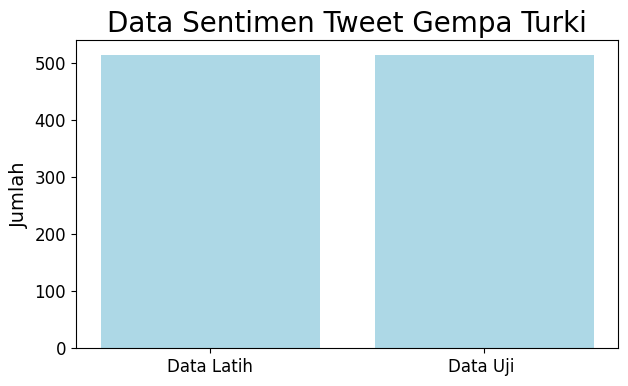

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(7,4))
plt.bar('Data Latih', ytrain.shape, color='lightblue')
plt.bar('Data Uji ', ytest.shape, color='lightblue')

plt.title('Data Sentimen Tweet Gempa Turki', size=20)
plt.ylabel('Jumlah', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

In [16]:
#xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.1, random_state = 40)
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.5, random_state = 0)
xtrain_dtm = cv.fit_transform(xtrain)
xtest_dtm = cv.transform(xtest)

# Training Naive Bayes (NB) classifier on training data.
clf = MultinomialNB().fit(xtrain_dtm,ytrain)
predicted = clf.predict(xtest_dtm)

#printing accuracy, Confusion matrix, Precision and Recall
acc = metrics.accuracy_score(ytest,predicted)*100
conf = metrics.confusion_matrix(ytest,predicted)
rec = metrics.classification_report(ytest,predicted)

print('\n Nilai akurasi klasifikasi Naive Bayes dengan Lexicon Based: ', "%.5s" % acc + "%")
print('\n Classification report is: \n', rec)


 Nilai akurasi klasifikasi Naive Bayes dengan Lexicon Based:  65.56%

 Classification report is: 
               precision    recall  f1-score   support

          -1       0.66      0.70      0.68       182
           0       0.56      0.23      0.33       115
           1       0.67      0.84      0.74       217

    accuracy                           0.66       514
   macro avg       0.63      0.59      0.59       514
weighted avg       0.64      0.66      0.63       514



In [ ]:
print('\n Confusion matrix: \n', conf)


 Confusion matrix: 
 [[ 83   4  21]
 [ 26  14  25]
 [ 19   2 115]]


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score

print("Akurasi =",accuracy_score(predicted, ytest))
precision, recall, fscore, support = score(ytest, predicted, average='weighted')
print("Presisi =", precision)
print("Recall =", recall)
print("F-score =", fscore)

Akurasi = 0.686084142394822
Presisi = 0.6882657189089227
Recall = 0.686084142394822
F-score = 0.6559797143063525


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

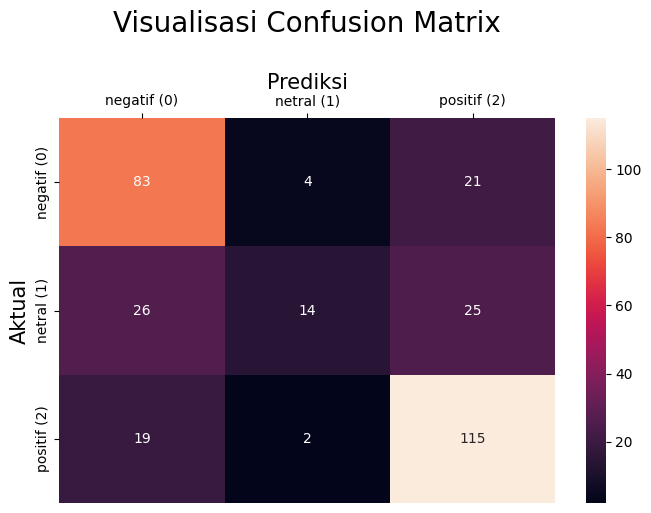

In [ ]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(ytest,predicted), annot=True, fmt=".0f", ax=ax)
plt.title('Visualisasi Confusion Matrix\n', size=20)
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
ax.set_xlabel('Prediksi', fontsize = 15)
ax.set_xticklabels(['negatif (0)', 'netral (1)', 'positif (2)'])
ax.set_ylabel('Aktual', fontsize = 15)
ax.set_yticklabels(['negatif (0)', 'netral (1)', 'positif (2)'])
plt.show()